# Gaussian Mixture Model

### Load libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, multivariate_normal
import warnings
warnings.filterwarnings('ignore')

### Read the data

In [5]:
data = pd.read_csv('data_mvnorm2mix.csv')
X = np.array(data)

### Plot the data

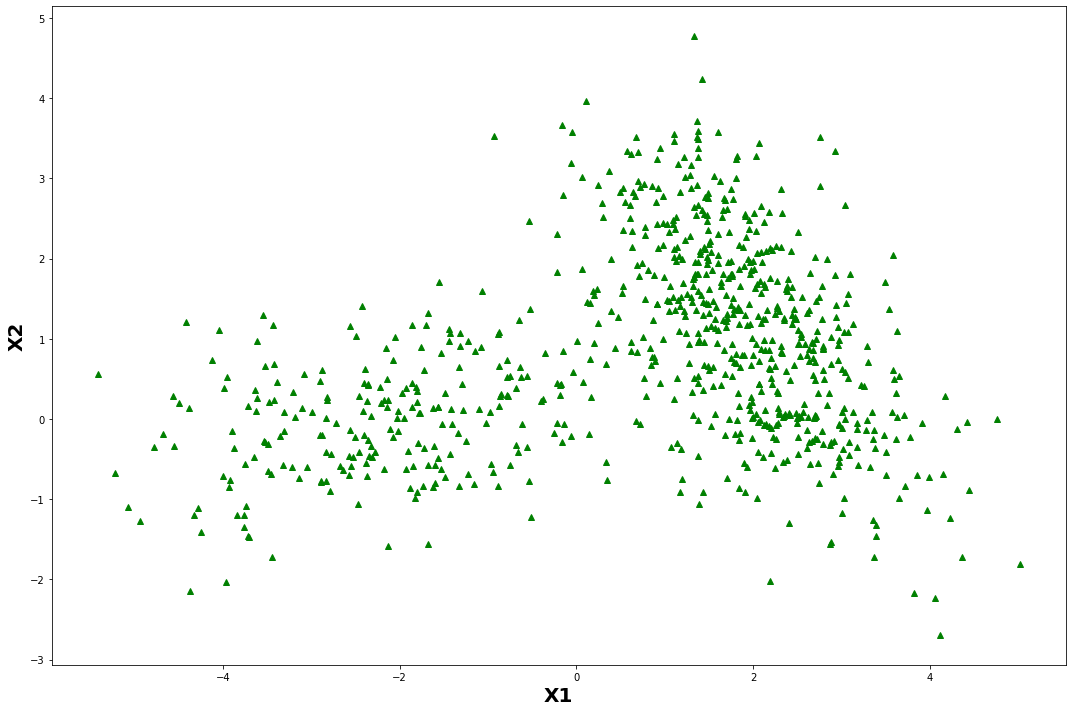

In [6]:
fig = plt.figure(figsize = (15,10))
plt.plot(X[:, 0], X[:, 1], 'g^')
plt.xlabel('X1',weight='bold',fontsize=20)
plt.ylabel('X2',weight='bold',fontsize=20)
plt.tight_layout()

### Gaussian Mixture Model

In [7]:
def GMM(X,p,mu1,mu2,sgma1,sgma2,nitr):
    resp = np.zeros((len(X), 2))
    log_likelihood = np.zeros((nitr, 1))
    for i in range(nitr):
        f = p[0]*multivariate_normal(mu1,sgma1).pdf(X)+p[1]*multivariate_normal(mu2,sgma2).pdf(X)
        z1 = (p[0])*multivariate_normal(mu1,sgma1).pdf(X)/f
        z2 = (p[1])*multivariate_normal(mu2,sgma2).pdf(X)/f
        p[0] = sum(z1)/len(X)
        p[1] = sum(z2)/len(X)
        mu1 = np.dot(z1.T,X)/sum(z1)
        mu2 = np.dot(z2.T,X)/sum(z2)
        sgma1 = np.dot(z1*(X-mu1).T,(X-mu1))/sum(z1)
        sgma2 = np.dot(z2*(X-mu2).T,(X-mu2))/sum(z2)
        resp[:, 0] = p[0] * multivariate_normal(mu1, sgma1).pdf(X)
        resp[:, 1] = p[1] * multivariate_normal(mu2, sgma2).pdf(X)    
        log_likelihood[i] = np.sum(np.log(np.sum(resp, axis = 1)))
    return p,mu1,mu2,sgma1,sgma2,log_likelihood 

### Initial Values

In [8]:
p = np.array([0.25,0.75])
mu1 = np.array([-1,1])
mu2 = np.array([4,5])
sgma1 = np.array([[5,.3],[.3,3.5]])
sgma2 = np.array([[0.8,-.5],[-.5,1.5]])

p,mu1,mu2,sgma1,sgma2, log_likelihood = GMM(X,p,mu1,mu2,sgma1,sgma2,100)

### Maximum Likelihood Estimation of the parameters

In [9]:
print('MLE of p:',p)
print('MLE of the first mean:',mu1)
print('MLE of the second mean:',mu2)

print('MLE of the first standard deviation:')
sgma1

print('MLE of the second standard deviation:')
sgma2

MLE of p: [0.30812007 0.69187993]
MLE of the first mean: [-2.0044957   0.02217512]
MLE of the second mean: [1.97673277 1.15430445]
MLE of the first standard deviation:
MLE of the second standard deviation:


array([[ 0.84339551, -0.66309604],
       [-0.66309604,  1.50319884]])

### Lets find the classes by the estimated parameters

In [10]:
resp1 = p[0]*multivariate_normal(mu1, sgma1).pdf(X)
resp2 = p[1]*multivariate_normal(mu2, sgma2).pdf(X)
u = resp1/resp2
class1 = X[np.where(u<1)]
class2 = X[np.where(u>=1)]


### Plotting the classification results

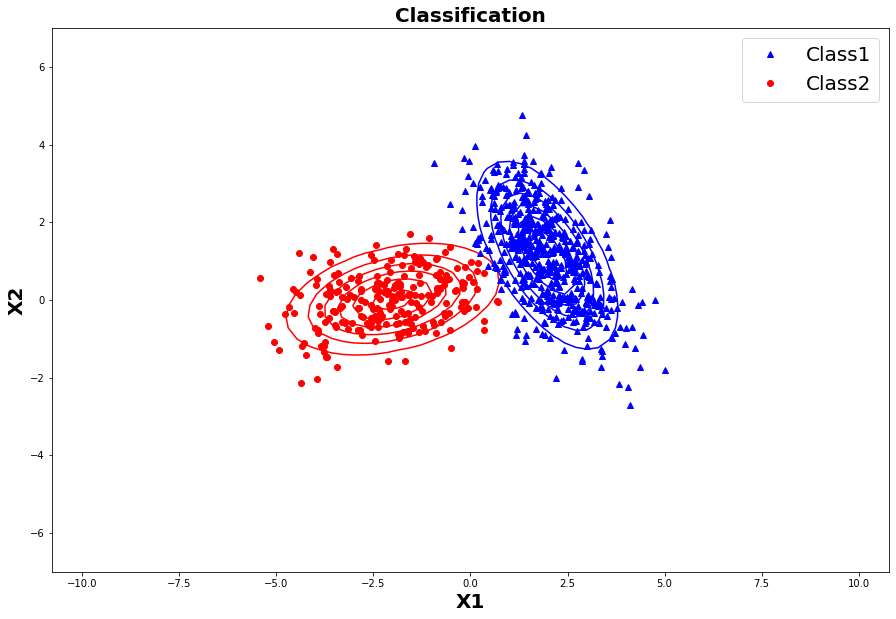

In [11]:
plt.figure(figsize=(15,10))
plt.plot(class1[:,0],class1[:,1], 'b^')
plt.plot(class2[:,0],class2[:,1], 'ro')
plt.axis('equal')
plt.xlabel('X1',weight='bold',fontsize=20)
plt.ylabel('X2',weight='bold',fontsize=20)
plt.title('Classification',weight='bold',fontsize=20)
plt.legend(['Class1','Class2'],fontsize=20)

x, y = np.meshgrid(np.linspace(-7, 7), np.linspace(-7,7))
t = np.column_stack((x.reshape(len(x)**2,1),y.reshape(len(y)**2,1)))
f1 = multivariate_normal(mu1,sgma1).pdf(t)
f2 = multivariate_normal(mu2,sgma2).pdf(t)
z1 = f1.reshape((len(x),len(x)))
z2 = f2.reshape((len(x),len(x)))
plt.contour(x, y, z1,linewidths=1.5, colors='r')
plt.contour(x, y, z2,linewidths=1.5, colors='b')
plt.show()